# Model evaluation and selection

# <span style='color:Blue'> Regression: Polynomial Fitting  </span>

In [30]:
%run src.ipynb
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

data = np.loadtxt('../data/data_modelEvalSelect_reg.csv', delimiter=',')

X = data[:,0].reshape((-1,1))
y = data[:,1].reshape((-1,1))

## Split the data into traing (60%), dev (20%), and test (20%) sets

In [31]:
X_train, X_, y_train, y_ = train_test_split(X,y,train_size=0.6, random_state=1)
X_dev, X_test, y_dev, y_test = train_test_split(X_,y_,train_size=0.5, random_state=1)
print(f"X.shape = {X.shape}, X_train.shape = {X_train.shape}, X_dev.shape = {X_dev.shape}, X_test.shape = {X_test.shape}")
print(f"y.shape = {y.shape}, y_train.shape = {y_train.shape}, y_dev.shape = {y_dev.shape}, y_test.shape = {y_test.shape}")

X.shape = (50, 1), X_train.shape = (30, 1), X_dev.shape = (10, 1), X_test.shape = (10, 1)
y.shape = (50, 1), y_train.shape = (30, 1), y_dev.shape = (10, 1), y_test.shape = (10, 1)


## Plot different data sets

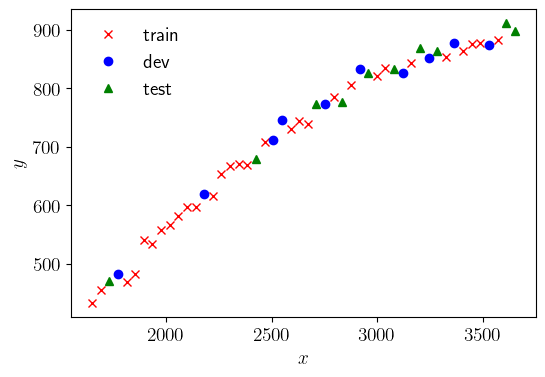

In [32]:
def PLOT():
    plt.figure(figsize=[6,4])
    plt.plot(X_train,y_train,'xr',label='train')
    plt.plot(X_dev,y_dev,'ob',label='dev')
    plt.plot(X_test,y_test,'^g',label='test')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend(frameon=False)

PLOT()
plt.show()

## Write a for loop to evaluate polynomial models of different degrees

train_MSE, dev_MSE =
 [[406.19401633 551.77843084]
 [ 49.11170759  87.6977129 ]
 [ 47.61634515  81.15043375]
 [ 47.1463707   79.43221405]
 [ 47.14266887  79.58792065]]


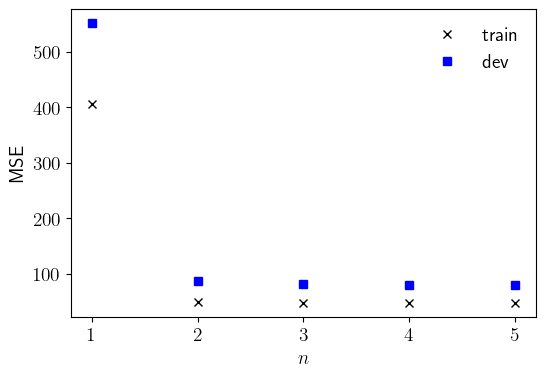

In [33]:
train_MSE = []
dev_MSE = []
models = []
norm_ls = []

degrees = range(1,6)
for degree in degrees:
    # Generate the mapped features
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_trainMapped = poly.fit_transform(X_train)
    
    # Normalize the mapped training data
    norm_l = tf.keras.layers.Normalization(axis=-1)
    norm_l.adapt(X_trainMapped)
    X_trainMappedn = norm_l(X_trainMapped)
    norm_ls.append(norm_l)
    
    # Fit the normalized mapped training data
    regr = linear_model.LinearRegression(fit_intercept=True)
    regr.fit(X_trainMappedn,y_train)
    models.append(regr)

    # Compute mean-squared-error for the training data
    yPredict = regr.predict(X_trainMappedn)
    train_MSE.append(0.5*mean_squared_error(y_train,yPredict))
    
    # Map and normalize the dev data
    X_devMapped = poly.fit_transform(X_dev)
    X_devMappedn = norm_l(X_devMapped)
    
    # Compute mean-square-error for the dev data
    yPredict = regr.predict(X_devMappedn)
    dev_MSE.append(0.5*mean_squared_error(y_dev,yPredict))
    

print(f"train_MSE, dev_MSE =\n {np.c_[train_MSE,dev_MSE]}")

    
plt.figure(figsize=[6,4])
plt.plot(degrees,train_MSE,'xk',label='train')
plt.plot(degrees,dev_MSE,'sb',label='dev')
plt.xlabel('$n$')
plt.ylabel('MSE')
plt.legend(frameon=False)
plt.show()

## Select the best model

In [34]:
degree = degrees[np.argmin(dev_MSE)]
print(f"lowest dev MSE occurs for a polynomial of degree n = {degree}")

lowest dev MSE occurs for a polynomial of degree n = 4


## Report the MSE for test data

In [35]:
index = np.argmin(dev_MSE)
poly = PolynomialFeatures(degree=degrees[index], include_bias=True)
X_testMapped = poly.fit_transform(X_test)
X_testMappedn = norm_ls[index](X_testMapped)
yPredict = models[index].predict(X_testMappedn)

print(f"train MSE is {train_MSE[index]}")
print(f"dev MSE is {dev_MSE[index]}")
print(f"test MSE is {0.5*mean_squared_error(y_test,yPredict)}")

train MSE is 47.1463707040191
dev MSE is 79.43221404823902
test MSE is 104.6326069150847


## Plot the data and best polynomial fit

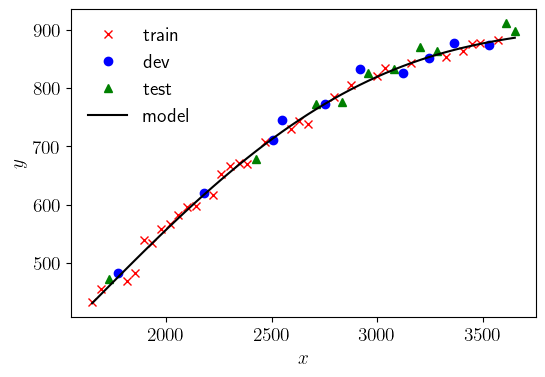

In [36]:
PLOT()
X_Mapped = poly.fit_transform(X)
X_Mappedn = norm_ls[index](X_Mapped)
yPredict = models[index].predict(X_Mappedn)
plt.plot(X,yPredict,'-k',label='model')

plt.legend(frameon=False)
plt.show()

# <span style='color:Blue'> Regression: Neural Network </span>
We follow a similar procedure but for 3 different neural network architectures.

## Write a for loop to evaluate different neural network architectures

In [37]:
def build_models():
    model_1 = Sequential(
        [
            Dense(25, activation = 'relu'),
            Dense(15, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_1'
    )

    model_2 = Sequential(
        [
            Dense(20, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(20, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_2'
    )

    model_3 = Sequential(
        [
            Dense(32, activation = 'relu'),
            Dense(16, activation = 'relu'),
            Dense(8, activation = 'relu'),
            Dense(4, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_3'
    )
    
    model_list = [model_1, model_2, model_3]
    
    return model_list


In [39]:
models = build_models()

train_MSE = []
dev_MSE = []

norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)
X_trainn = norm_l(X_train)
X_devn = norm_l(X_dev)
X_testn = norm_l(X_test)

for model in models:
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
    
    model.fit(
        X_trainn, y_train,
        epochs=300,
        verbose=0
    )
    yPredict = model.predict(X_trainn,verbose=0)
    train_MSE.append(0.5*mean_squared_error(y_train, yPredict))
    
    # dev MSE
    yPredict = model.predict(X_devn,verbose=0)
    dev_MSE.append(0.5*mean_squared_error(y_dev, yPredict))
    

for i in range(len(models)):
    print(f"Model {i+1}: train_MSE, dev_MSE = {train_MSE[i], dev_MSE[i]}\n")


Model 1: train_MSE, dev_MSE = (75.39194115066613, 98.69666235392309)

Model 2: train_MSE, dev_MSE = (73.19237018268205, 111.95213581875915)

Model 3: train_MSE, dev_MSE = (54.741553302572925, 85.04318709551109)



## Notes:

* A simple linear regression could be obtained by setting all the activations linear.
* Rerunning the code above yields different results since the model initializes the parameters randomly, even if you call tf.random.set_seed(seed_number).

We pick the third model. We can now compute the test MSE.

In [40]:
yPredict = model.predict(X_testn,verbose=0)
test_MSE = 0.5*mean_squared_error(y_test,yPredict)

index = np.argmin(dev_MSE)
print(f"train MSE is {train_MSE[index]}")
print(f"dev MSE is {dev_MSE[index]}")
print(f"test MSE is {test_MSE}")

train MSE is 54.741553302572925
dev MSE is 85.04318709551109
test MSE is 97.17108936372033


## Plot the data and best model

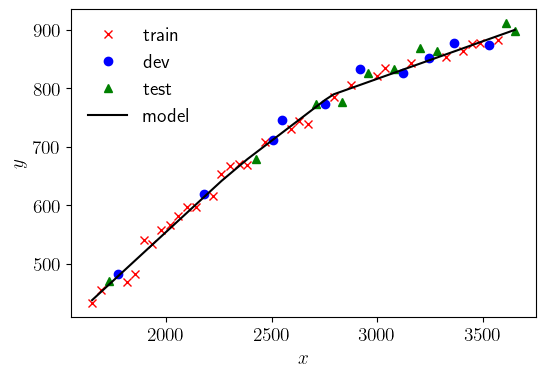

In [41]:
PLOT()
yPredict = models[index].predict(norm_l(X),verbose = 0)
plt.plot(X,yPredict,'-k',label='model')

plt.legend(frameon=False)
plt.show()

# <span style='color:Blue'> Classification </span>

## Load data and plot

data.shape = (200, 3)
X.shape = (200, 2)
y.shape = (200, 1)


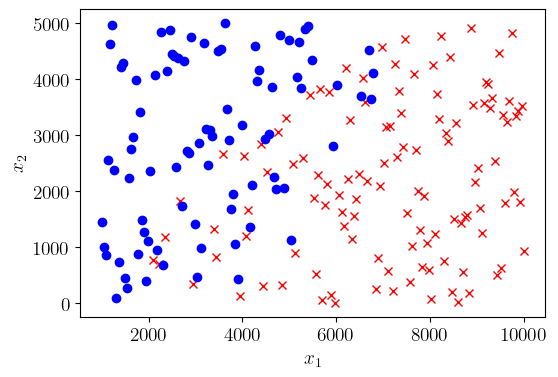

In [42]:
data = data = np.loadtxt('../data/data_modelEvalSelect_cat.csv', delimiter=',')
print(f"data.shape = {data.shape}")
X = data[:,0:-1]
y = data[:,-1].reshape((-1,1))
print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}")

yes = y[:,0] == 1
no = y[:,0] == 0

plt.figure(figsize=[6,4])
plt.plot(X[yes,0],X[yes,1],'xr',label='yes')
plt.plot(X[no,0],X[no,1],'ob',label='no')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

## Split the data using Scikit-learn

In [43]:
X_train, X_, y_train, y_ = train_test_split(X,y,train_size=0.6, random_state=1)
X_dev, X_test, y_dev, y_test = train_test_split(X_,y_,train_size=0.5, random_state=1)
print(X_train[:5,:])
print(f"X.shape = {X.shape}, X_train.shape = {X_train.shape}, X_dev.shape = {X_dev.shape}, X_test.shape = {X_test.shape}")
print(f"y.shape = {y.shape}, y_train.shape = {y_train.shape}, y_dev.shape = {y_dev.shape}, y_test.shape = {y_test.shape}")

[[7964.8241206   603.01507538]
 [5070.35175879 2487.43718593]
 [4663.31658291 2261.30653266]
 [6517.5879397  3693.46733668]
 [9638.19095477 3241.20603015]]
X.shape = (200, 2), X_train.shape = (120, 2), X_dev.shape = (40, 2), X_test.shape = (40, 2)
y.shape = (200, 1), y_train.shape = (120, 1), y_dev.shape = (40, 1), y_test.shape = (40, 1)


## Neural network models
We use the same architectures we had for the regression problem. The output layer is linear and will be converted to probability by **sigmoid** function. Additionally, we will use BinaryCrossentropy for the loss with from_logits=True.

In [48]:
train_Err = []
dev_Err = []

models = build_models()

for model in models:
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

    
    model.fit(X_train, y_train, epochs=200, verbose=0)
    
    z = model.predict(X_train,verbose=0)
    probs = tf.math.sigmoid(z)
    yPredict = np.where(probs >= 0.5, 1, 0)
    train_Err.append(np.mean(yPredict != y_train))

    z = model.predict(X_dev,verbose=0)
    probs = tf.math.sigmoid(z)
    yPredict = np.where(probs >= 0.5, 1, 0)
    dev_Err.append(np.mean(yPredict != y_dev))


for i in range(len(models)):
    print(f"Model {i+1}: train_Err, dev_Err = {train_Err[i]:.5f}, {dev_Err[i]:.5f}\n")

Model 1: train_Err, dev_Err = 0.20000, 0.20000

Model 2: train_Err, dev_Err = 0.32500, 0.32500

Model 3: train_Err, dev_Err = 0.15833, 0.05000



In [49]:
index = np.argmin(dev_Err)
z = models[index].predict(X_test,verbose=0)
probs = tf.math.sigmoid(z)
yPredict = np.where(probs >= 0.5, 1, 0)
test_Err = np.mean(yPredict != y_test)
    
print(f"train Err is {train_Err[index]:.5f}")
print(f"dev Err is {dev_Err[index]:.5f}")
print(f"test Err is {test_Err:.5f}")

train Err is 0.15833
dev Err is 0.05000
test Err is 0.07500
